# 1. Import Library

In [332]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [333]:
path_electricity_generation_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\Electricity_Generation_Processed.csv"
path_population_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\population_monthly.csv"
path_sunshine_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\sunshine_monthly.csv"
path_humidity_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-humidity-handled-data.csv"
path_rainfall_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-rainfall-handled-data.csv"
path_temperature_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-temperature-handled-data.csv"

In [334]:
path_electricity_generation_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\Electricity_Generation_Processed.csv"
path_population_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\population_monthly.csv"
path_sunshine_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\sunshine_monthly.csv"
path_humidity_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-humidity-handled-data.csv"
path_rainfall_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-rainfall-handled-data.csv"
path_temperature_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-temperature-handled-data.csv"

In [335]:
electricity_df_train = pd.read_csv(path_electricity_generation_train)
population_df_train = pd.read_csv(path_population_train)
sunshine_df_train = pd.read_csv(path_sunshine_train)
humidity_df_train = pd.read_csv(path_humidity_train)
rainfall_df_train = pd.read_csv(path_rainfall_train)
temperature_df_train = pd.read_csv(path_temperature_train)

electricity_df_train["Date"] = pd.to_datetime(electricity_df_train["Date"])
population_df_train["Date"] = pd.to_datetime(population_df_train["Date"])
sunshine_df_train["Date"] = pd.to_datetime(sunshine_df_train["Date"])
humidity_df_train["Date"] = pd.to_datetime(humidity_df_train["Date"])
rainfall_df_train["Date"] = pd.to_datetime(rainfall_df_train["Date"])
temperature_df_train["Date"] = pd.to_datetime(temperature_df_train["Date"])

# Đặt cột 'Date' làm chỉ số cho từng DataFrame
electricity_df_train.set_index('Date', inplace=True)
population_df_train.set_index('Date', inplace=True)
sunshine_df_train.set_index('Date', inplace=True)
humidity_df_train.set_index('Date', inplace=True)
rainfall_df_train.set_index('Date', inplace=True)
temperature_df_train.set_index('Date', inplace=True)

In [336]:
electricity_df_test = pd.read_csv(path_electricity_generation_test)
population_df_test = pd.read_csv(path_population_test)
sunshine_df_test = pd.read_csv(path_sunshine_test)
humidity_df_test = pd.read_csv(path_humidity_test)
rainfall_df_test = pd.read_csv(path_rainfall_test)
temperature_df_test = pd.read_csv(path_temperature_test)

electricity_df_test["Date"] = pd.to_datetime(electricity_df_test["Date"])
population_df_test["Date"] = pd.to_datetime(population_df_test["Date"])
sunshine_df_test["Date"] = pd.to_datetime(sunshine_df_test["Date"])
humidity_df_test["Date"] = pd.to_datetime(humidity_df_test["Date"])
rainfall_df_test["Date"] = pd.to_datetime(rainfall_df_test["Date"])
temperature_df_test["Date"] = pd.to_datetime(temperature_df_test["Date"])

# Đặt cột 'Date' làm chỉ số cho từng DataFrame
electricity_df_test.set_index('Date', inplace=True)
population_df_test.set_index('Date', inplace=True)
sunshine_df_test.set_index('Date', inplace=True)
humidity_df_test.set_index('Date', inplace=True)
rainfall_df_test.set_index('Date', inplace=True)
temperature_df_test.set_index('Date', inplace=True)

In [337]:
path_electricity_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\electricity.pkl"
path_population_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\population.pkl"
path_sunshine_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\sunshine.pkl"
path_humidity_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\humidity.pkl"
path_rainfall_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\rainfall.pkl"
path_temperature_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\temperature.pkl"

In [338]:
# List các đường dẫn
paths = [
    path_electricity_generation_train,
    path_population_train,
    path_sunshine_train,
    path_humidity_train,
    path_rainfall_train,
    path_temperature_train,
]

In [339]:
YEARS = [year for year in range(2002, 2023)]

In [340]:
MONTHS = [month for month in range(1, 13)]

# 2. Prediction Using ARIMA Model

## 2.1 Check for stationarity using time series plotting

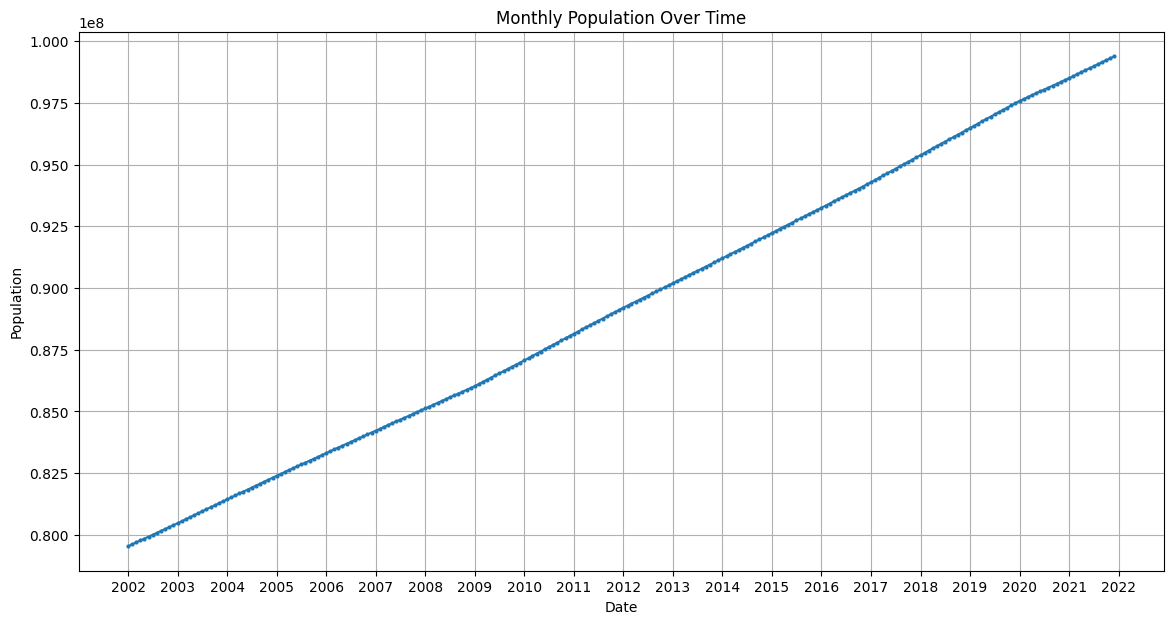

In [341]:
plt.figure(figsize=(14, 7))
plt.plot(population_df_train.index, population_df_train['Population'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Monthly Population Over Time')

plt.grid(True)
plt.show()


## 2.2 Check for stationarity using time series plotting using ACF Plot and PACF Plot

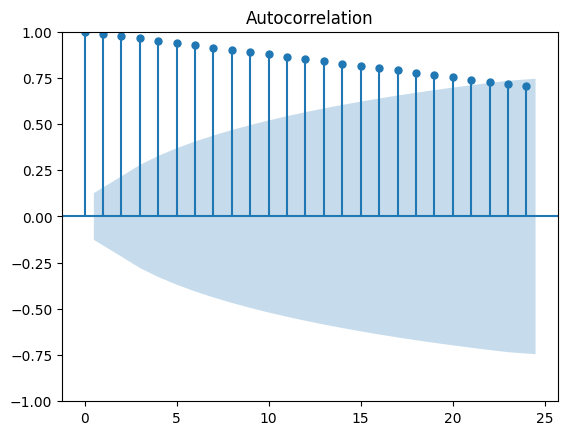

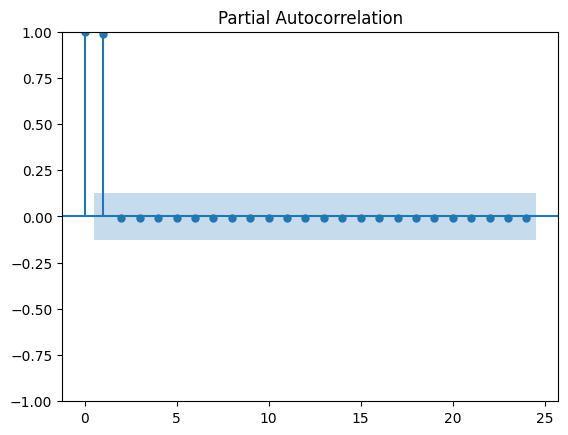

In [342]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'population_df' is your DataFrame
# Select the 'Population' column
population_series_train = population_df_train['Population']

# Plot ACF and PACF
acf_original = plot_acf(population_series_train)
pacf_original = plot_pacf(population_series_train)

## 2.3 Check for stationarity using time series plotting using ADF test

In [343]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(population_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.9837243452632933


## 2.4 Transform to stationary: differencing

<Axes: xlabel='Date'>

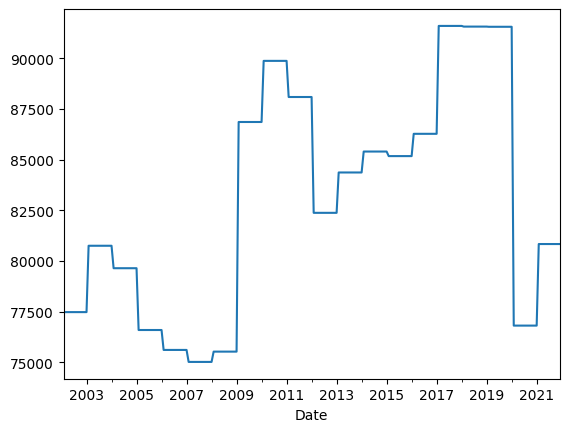

In [344]:
df_train_diff1 = population_series_train.diff().dropna()
df_train_diff1.plot()

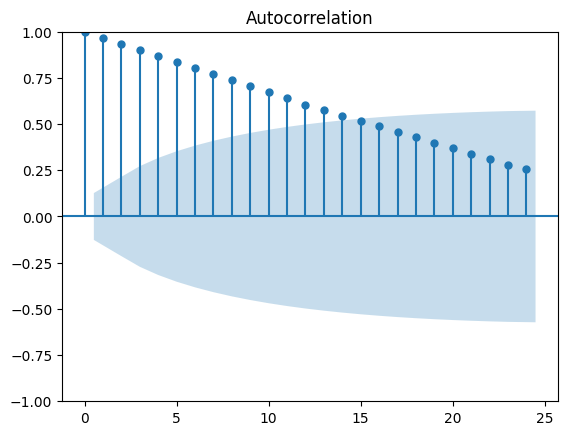

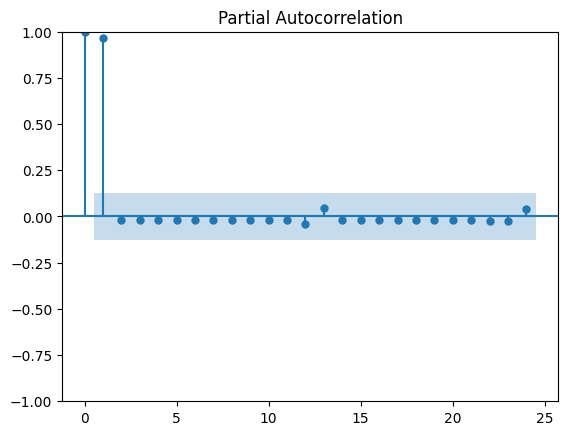

In [345]:
acf_diff1 = plot_acf(df_train_diff1)
pacf_diff1 = plot_pacf(df_train_diff1)

In [346]:
adf_test1 = adfuller(df_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 0.2779901712394786


<Axes: xlabel='Date'>

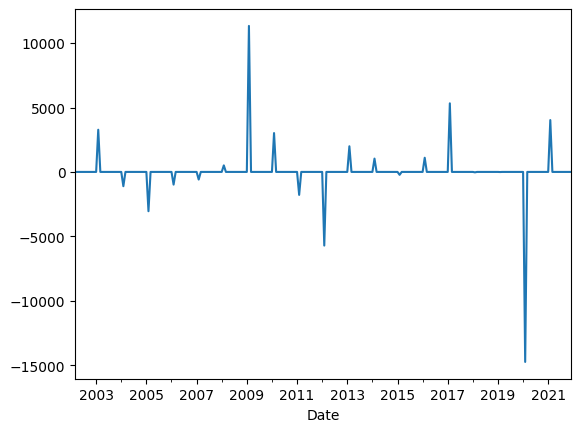

In [347]:
# Calculate the second differenced series
df_train_diff2 = df_train_diff1.diff().dropna()
df_train_diff2.plot()

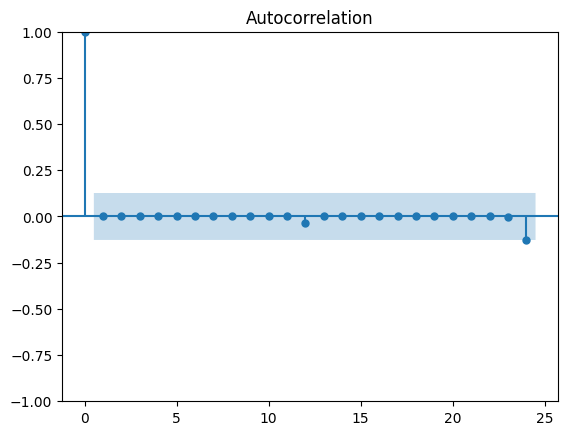

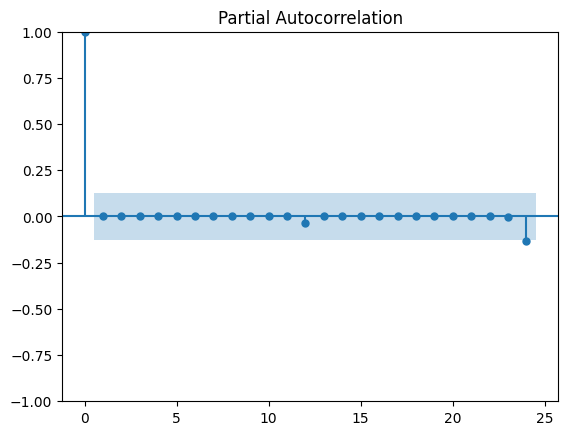

In [348]:
acf_diff2 = plot_acf(df_train_diff2)
pacf_diff2 = plot_pacf(df_train_diff2)

In [349]:
adf_test2 = adfuller(df_train_diff2)
print(f'p-value: {adf_test2[1]}')

p-value: 3.9427671696772263e-28


## 2.5: Determine ARIMA models parameters p, q

Giải thích....

## 2.5 Grid Search using Auto-fit to survey parameters p, d, q

In [350]:
import pmdarima as pm

auto_arima = pm.auto_arima(population_series_train, 
                           start_p=0, start_d=0, start_q=0,
                           max_p=5, max_d=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=None, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)  # Không cố định d

print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4126.687, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4128.712, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4128.744, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4124.719, Time=0.02 sec


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=4130.723, Time=0.16 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.311 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2061.360
Date:                Mon, 27 May 2024   AIC                           4124.719
Time:                        15:28:53   BIC                           4128.192
Sample:                    01-01-2002   HQIC                          4126.119
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.936e+06   2.93e+04     66.028      0.000    1.88e+06 

## 2.6 Fit the ARIMA model

In [351]:
from statsmodels.tsa.arima.model import ARIMA

# Tạo mô hình ARIMA với tham số (0, 2, 0)
population_model = ARIMA(population_series_train, order=(0, 2, 0))

# Huấn luyện mô hình
fitted_population_model = population_model.fit()

# In ra tóm tắt mô hình
print(fitted_population_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                  240
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -2061.360
Date:                Mon, 27 May 2024   AIC                           4124.719
Time:                        15:28:53   BIC                           4128.192
Sample:                    01-01-2002   HQIC                          4126.119
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.936e+06   2.93e+04     66.028      0.000    1.88e+06    1.99e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             49110.46
Prob(Q):                              1.00   Pr

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [352]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_population_model, path_population_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\population.pkl']

## 2.7 Make time series predictions

In [353]:
population_series_test = population_df_test['Population']

In [354]:
# Nối hai series
population_series = pd.concat([population_series_train, population_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(population_series.head())
print(population_series.tail())


Date
2002-01-01    79537700.0
2002-02-01    79615175.0
2002-03-01    79692650.0
2002-04-01    79770125.0
2002-05-01    79847600.0
Name: Population, dtype: float64
Date
2022-08-01    9.998415e+07
2022-09-01    1.000570e+08
2022-10-01    1.001298e+08
2022-11-01    1.002026e+08
2022-12-01    1.002754e+08
Name: Population, dtype: float64


In [355]:
# Tải mô hình từ file
loaded_population_model = joblib.load(path_population_model)

population_series_prediction = loaded_population_model.forecast(len(population_series_test))

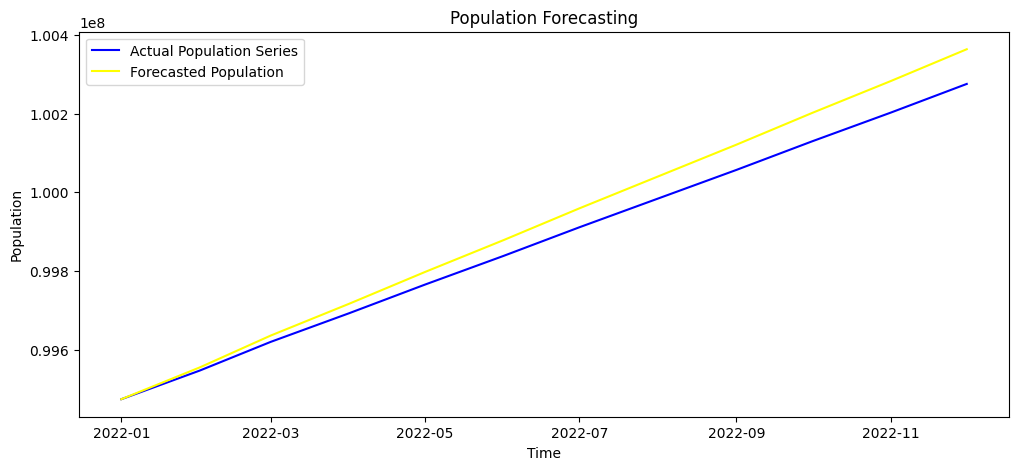

In [360]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(population_series_test, color='blue', label='Actual Population Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của population_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = population_series_prediction.index
plt.plot(prediction_index, population_series_prediction, color='yellow', label='Forecasted Population')

# Thêm tiêu đề và nhãn
plt.title('Population Forecasting')
plt.xlabel('Time')
plt.ylabel('Population')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


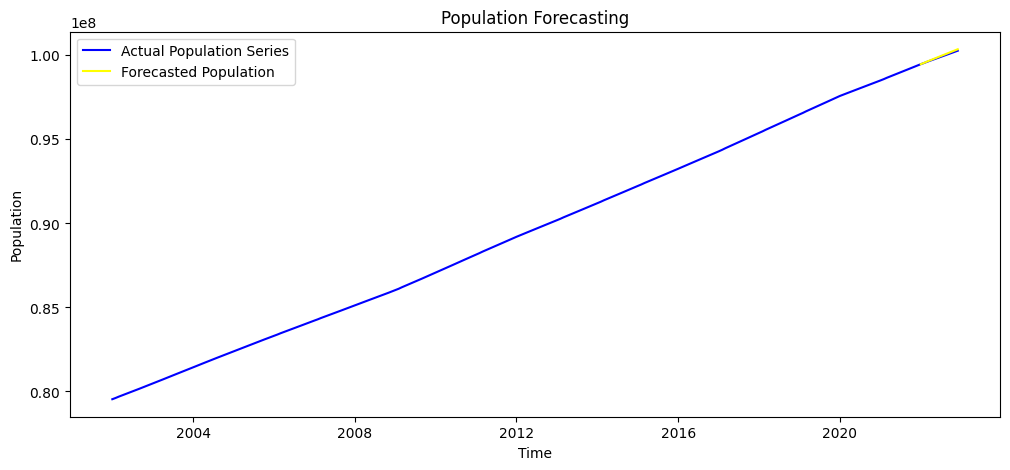

In [361]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(population_series, color='blue', label='Actual Population Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của population_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = population_series_prediction.index
plt.plot(prediction_index, population_series_prediction, color='yellow', label='Forecasted Population')

# Thêm tiêu đề và nhãn
plt.title('Population Forecasting')
plt.xlabel('Time')
plt.ylabel('Population')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


## 2.8 Evaluate model predictions

In [362]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(population_series_test, population_series_prediction)
mape = mean_absolute_percentage_error(population_series_test, population_series_prediction)
rmse = np.sqrt(mean_squared_error(population_series_test, population_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 44087.083333333336
mape - manual: 0.0004407284031023954
rmse - manual: 52051.50792869447


# 3. Prediction Using SARIMA Model

## 3.1 Temperature Data

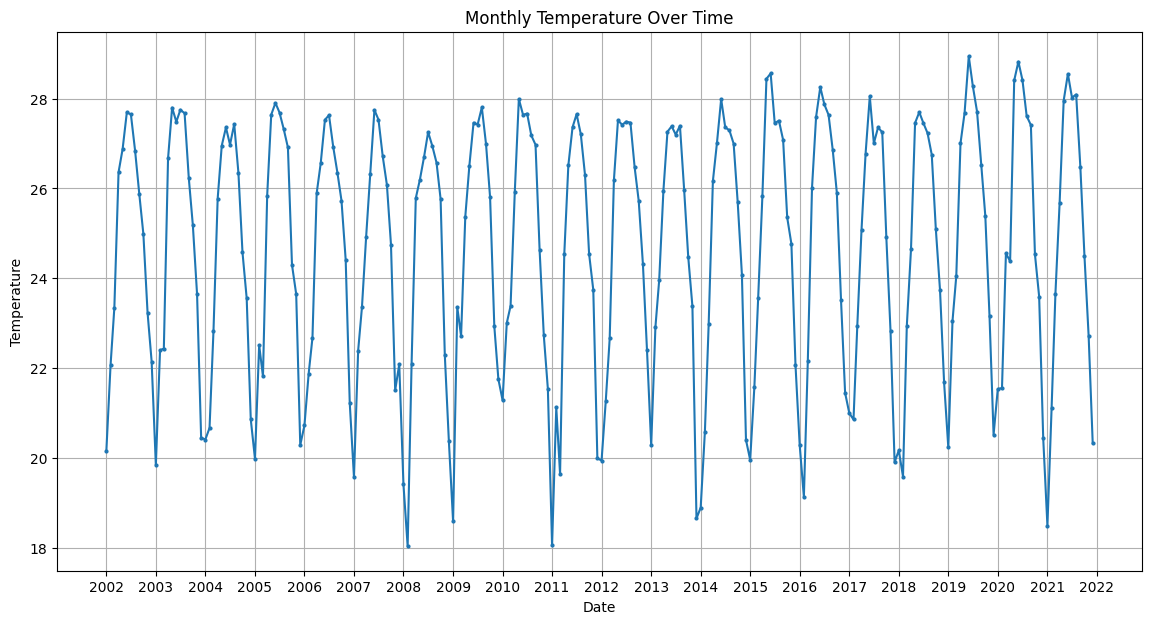

In [363]:
plt.figure(figsize=(14, 7))
plt.plot(temperature_df_train.index, temperature_df_train['Temperature'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Temperature Over Time')

plt.grid(True)
plt.show()


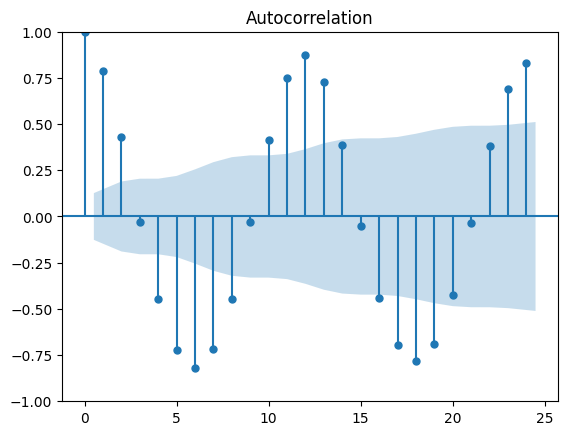

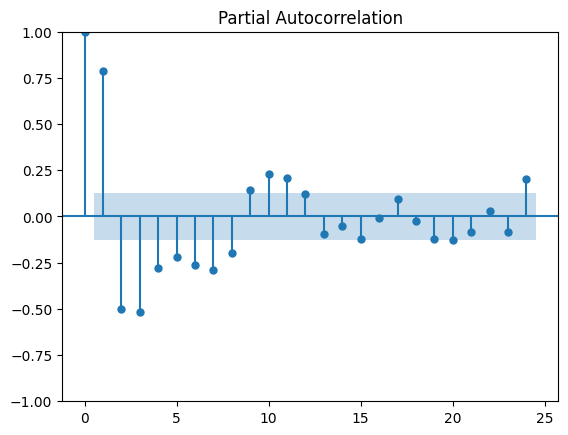

In [364]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'temperature_df' is your DataFrame
# Select the 'Temperature' column
temperature_series_train = temperature_df_train['Temperature']

# Plot ACF and PACF
acf_original = plot_acf(temperature_series_train)
pacf_original = plot_pacf(temperature_series_train)

In [365]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(temperature_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 5.413109172437022e-05


In [366]:
import pmdarima as pm

auto_arima = pm.auto_arima(temperature_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=3, max_D=1, max_Q=3,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=0, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1184.627, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=934.923, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2224.957, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1015.594, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=715.965, Time=0.37 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=767.091, Time=0.32 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=932.332, Time=0.90 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=841.078, Time=0.22 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1111.286, Time=0.71 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=824.877, Time=1.22 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=722.415, Time=0.51 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : AI

In [367]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
temperature_model = ARIMA(temperature_series_train, 
                     order=(1, 0, 4), 
                     seasonal_order=(2, 0, 1, 12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_temperature_model = temperature_model.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [369]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_temperature_model, path_temperature_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\temperature.pkl']

In [370]:
temperature_series_test = temperature_df_test['Temperature']

In [371]:
# Nối hai series
temperature_series = pd.concat([temperature_series_train, temperature_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(temperature_series.head())
print(temperature_series.tail())


Date
2002-01-01    20.1471
2002-02-01    22.0605
2002-03-01    23.3405
2002-04-01    26.3616
2002-05-01    26.8793
Name: Temperature, dtype: float64
Date
2022-08-01    27.226667
2022-09-01    26.493333
2022-10-01    24.586667
2022-11-01    24.400000
2022-12-01    19.713333
Name: Temperature, dtype: float64


In [372]:
# Tải mô hình từ file
loaded_temperature_model = joblib.load(path_temperature_model)

temperature_series_prediction = loaded_temperature_model.forecast(len(temperature_series_test))

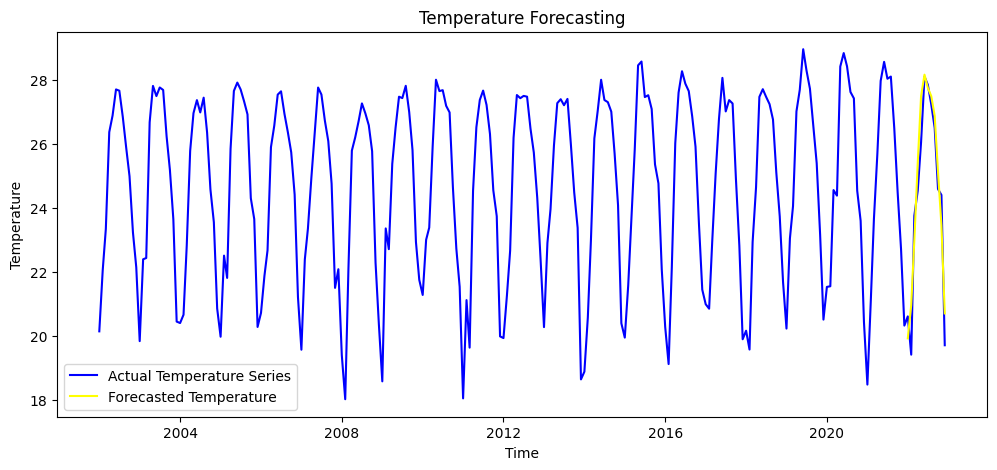

In [373]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(temperature_series, color='blue', label='Actual Temperature Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của temperature_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = temperature_series_prediction.index
plt.plot(prediction_index, temperature_series_prediction, color='yellow', label='Forecasted Temperature')

# Thêm tiêu đề và nhãn
plt.title('Temperature Forecasting')
plt.xlabel('Time')
plt.ylabel('Temperature')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [374]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(temperature_series_test, temperature_series_prediction)
mape = mean_absolute_percentage_error(temperature_series_test, temperature_series_prediction)
rmse = np.sqrt(mean_squared_error(temperature_series_test, temperature_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.7147473104773704
mape - manual: 0.031355110529887
rmse - manual: 0.8501902061160139


## 3.2 Humidity Data

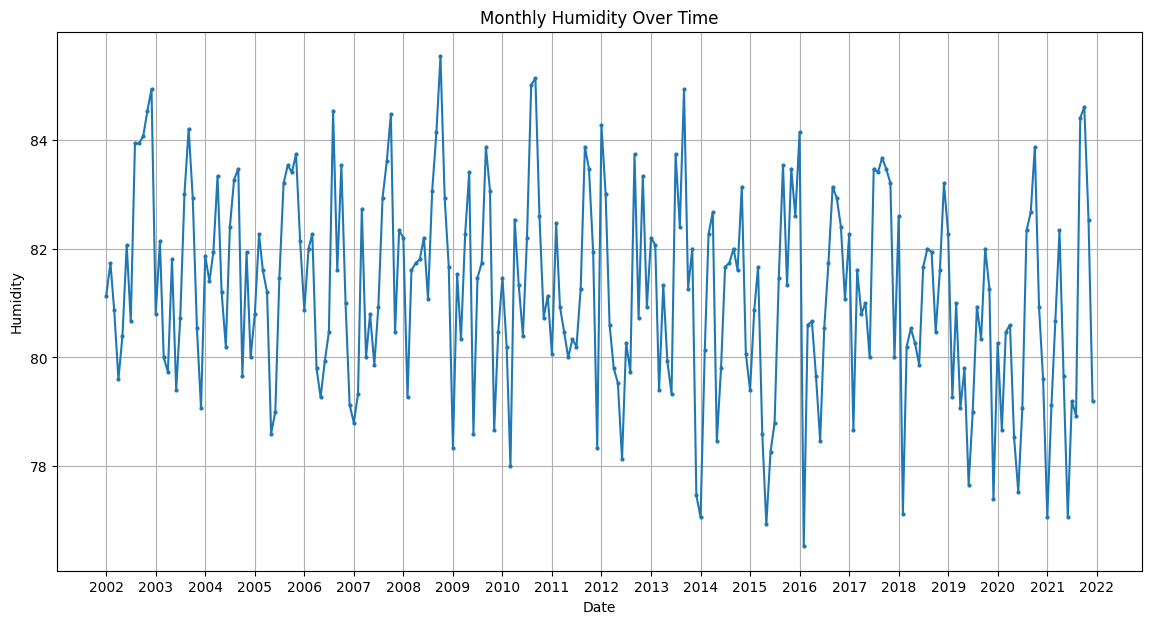

In [375]:
plt.figure(figsize=(14, 7))
plt.plot(humidity_df_train.index, humidity_df_train['Humidity'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Monthly Humidity Over Time')

plt.grid(True)
plt.show()


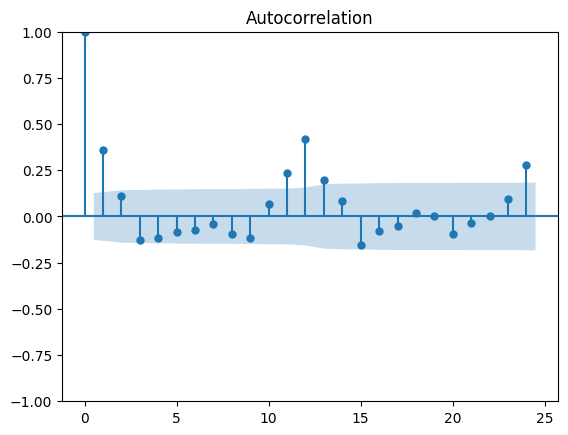

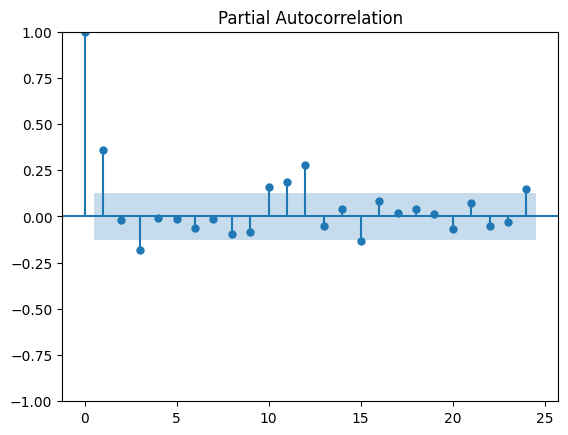

In [376]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'humidity_df' is your DataFrame
# Select the 'humidity' column
humidity_series_train = humidity_df_train['Humidity']

# Plot ACF and PACF
acf_original = plot_acf(humidity_series_train)
pacf_original = plot_pacf(humidity_series_train)

In [377]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(humidity_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.09287400271030405


<Axes: xlabel='Date'>

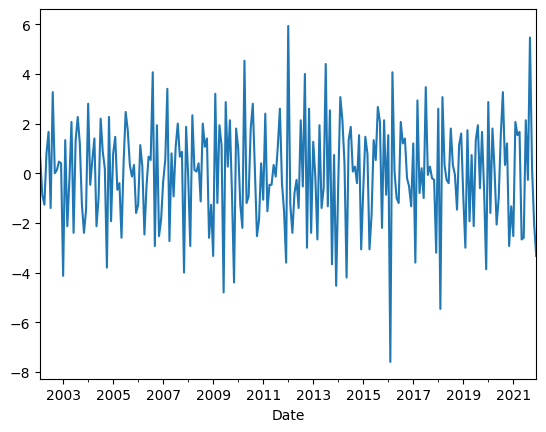

In [378]:
df_train_diff1 = humidity_series_train.diff().dropna()
df_train_diff1.plot()

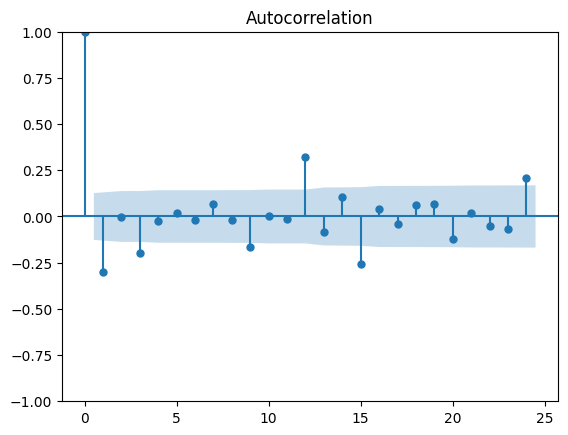

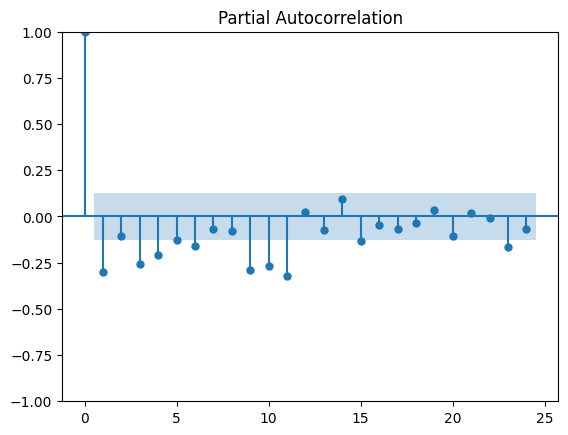

In [379]:
acf_diff1 = plot_acf(df_train_diff1)
pacf_diff1 = plot_pacf(df_train_diff1)

In [380]:
adf_test1 = adfuller(df_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 2.512599917289736e-09


In [381]:
import pmdarima as pm

auto_arima = pm.auto_arima(humidity_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=3, max_D=1, max_Q=3,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=1, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1035.951, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=981.699, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1033.955, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1015.330, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=979.215, Time=0.19 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=979.867, Time=0.48 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=973.821, Time=0.35 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=991.142, Time=0.22 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=985.369, Time=0.21 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1008.597, Time=0.15 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=96

In [382]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
humidity_model = ARIMA(humidity_series_train, 
                     order=(3, 1, 1), 
                     seasonal_order=(1, 0, 1, 12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_humidity_model = humidity_model.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [383]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_humidity_model, path_humidity_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\humidity.pkl']

In [384]:
humidity_series_test = humidity_df_test['Humidity']

In [385]:
# Nối hai series
humidity_series = pd.concat([humidity_series_train, humidity_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(humidity_series.head())
print(humidity_series.tail())


Date
2002-01-01    81.133333
2002-02-01    81.733333
2002-03-01    80.866667
2002-04-01    79.600000
2002-05-01    80.400000
Name: Humidity, dtype: float64
Date
2022-08-01    82.333333
2022-09-01    83.266667
2022-10-01    80.000000
2022-11-01    82.333333
2022-12-01    77.266667
Name: Humidity, dtype: float64


In [386]:
# Tải mô hình từ file
loaded_humidity_model = joblib.load(path_humidity_model)

humidity_series_prediction = loaded_humidity_model.forecast(len(humidity_series_test))

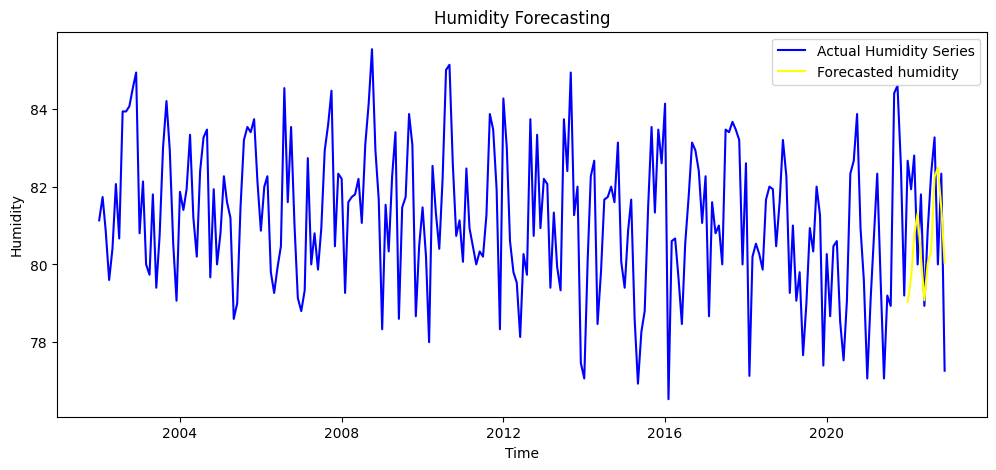

In [387]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(humidity_series, color='blue', label='Actual Humidity Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của humidity_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = humidity_series_prediction.index
plt.plot(prediction_index, humidity_series_prediction, color='yellow', label='Forecasted humidity')

# Thêm tiêu đề và nhãn
plt.title('Humidity Forecasting')
plt.xlabel('Time')
plt.ylabel('Humidity')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [388]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(humidity_series_test, humidity_series_prediction)
mape = mean_absolute_percentage_error(humidity_series_test, humidity_series_prediction)
rmse = np.sqrt(mean_squared_error(humidity_series_test, humidity_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 1.7536533744817528
mape - manual: 0.02160142855629046
rmse - manual: 1.986858752787138


## 3.3 Sunshine Data

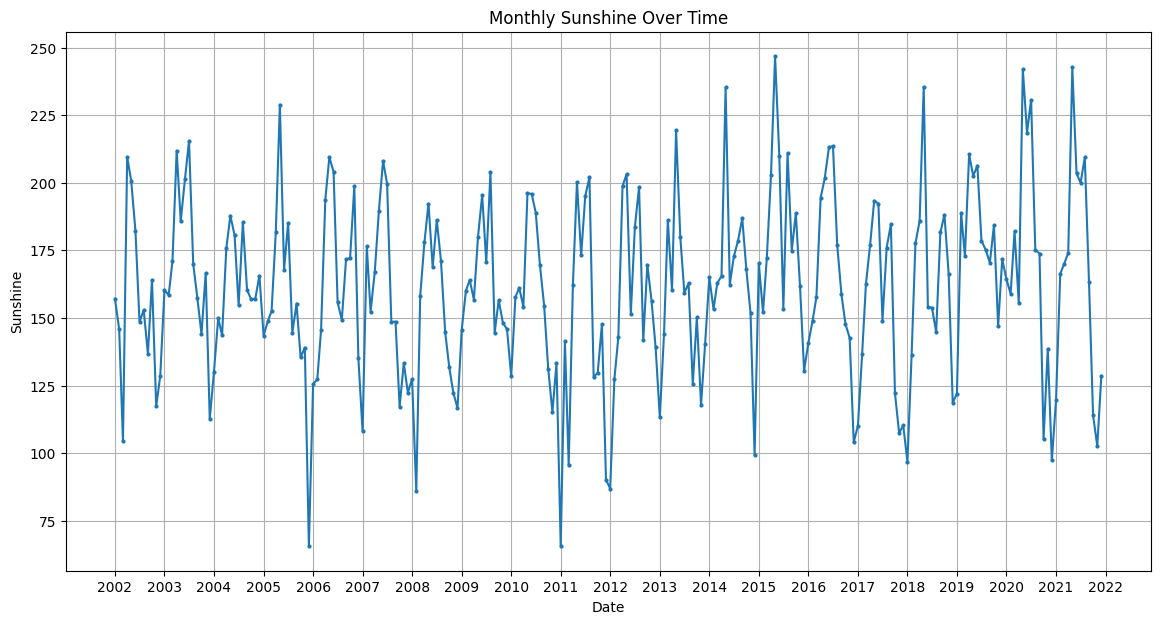

In [389]:
plt.figure(figsize=(14, 7))
plt.plot(sunshine_df_train.index, sunshine_df_train['Average Sunshine'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Sunshine')
plt.title('Monthly Sunshine Over Time')

plt.grid(True)
plt.show()


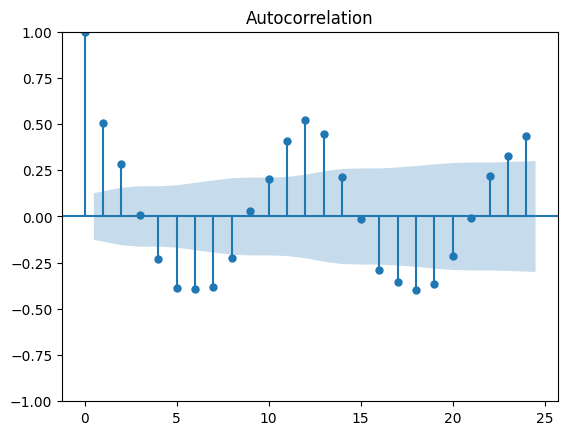

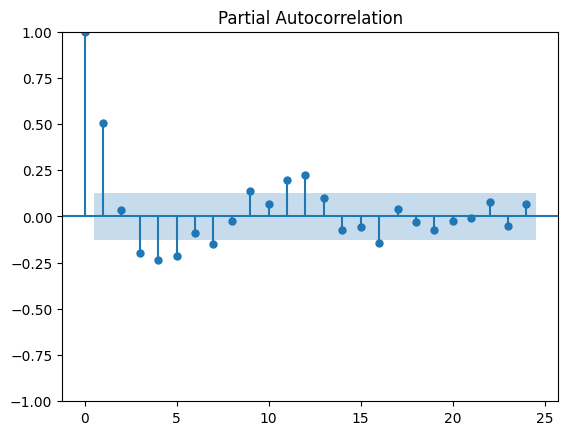

In [390]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'sunshine_df' is your DataFrame
# Select the 'sunshine' column
sunshine_series_train = sunshine_df_train['Average Sunshine']

# Plot ACF and PACF
acf_original = plot_acf(sunshine_series_train)
pacf_original = plot_pacf(sunshine_series_train)

In [391]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(sunshine_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.015967919914884804


In [392]:
import pmdarima as pm

auto_arima = pm.auto_arima(sunshine_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=3, max_D=1, max_Q=3,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=0, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2364.052, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2265.004, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2290.343, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3133.907, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2295.088, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2260.632, Time=1.68 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=2238.502, Time=2.60 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=2251.164, Time=2.27 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2238.533, Time=0.88 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=2257.874, Time=2.11 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=2235.733, Time=3.24 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2263.474, Time=2.34 sec
 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=2259.306, Time=1.29 sec
 ARIMA(3,0,0)(3,0,0)[12]

In [393]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
sunshine_model = ARIMA(sunshine_series_train, 
                     order=(2,0,0), 
                     seasonal_order=(3, 0, 0, 12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_sunshine_model = sunshine_model.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [394]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_sunshine_model, path_sunshine_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\sunshine.pkl']

In [395]:
sunshine_series_test = sunshine_df_test['Average Sunshine']

In [396]:
sunshine_series = pd.concat([sunshine_series_train, sunshine_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(sunshine_series.head())
print(sunshine_series.tail())


Date
2002-01-01    157.133333
2002-02-01    145.800000
2002-03-01    104.400000
2002-04-01    209.600000
2002-05-01    200.533333
Name: Average Sunshine, dtype: float64
Date
2022-08-01    184.360000
2022-09-01    150.546667
2022-10-01    153.026667
2022-11-01    156.140000
2022-12-01    108.173333
Name: Average Sunshine, dtype: float64


In [397]:
# Tải mô hình từ file
loaded_sunshine_model = joblib.load(path_sunshine_model)

sunshine_series_prediction = loaded_sunshine_model.forecast(len(sunshine_series_test))

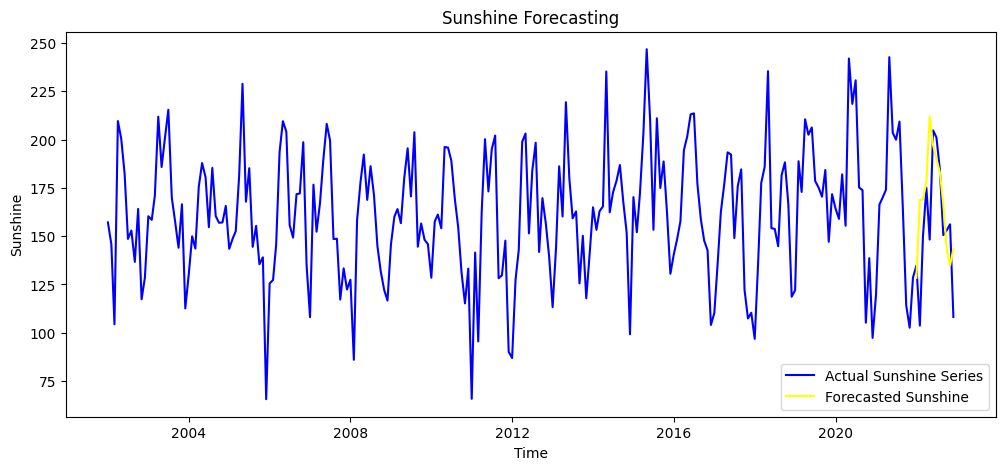

In [398]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(sunshine_series, color='blue', label='Actual Sunshine Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của sunshine_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = sunshine_series_prediction.index
plt.plot(prediction_index, sunshine_series_prediction, color='yellow', label='Forecasted Sunshine')

# Thêm tiêu đề và nhãn
plt.title('Sunshine Forecasting')
plt.xlabel('Time')
plt.ylabel('Sunshine')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [399]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(sunshine_series_test, sunshine_series_prediction)
mape = mean_absolute_percentage_error(sunshine_series_test, sunshine_series_prediction)
rmse = np.sqrt(mean_squared_error(sunshine_series_test, sunshine_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 21.66868718787754
mape - manual: 0.1653219126310662
rmse - manual: 30.239094815613207


## 3.4 Rainfall Data

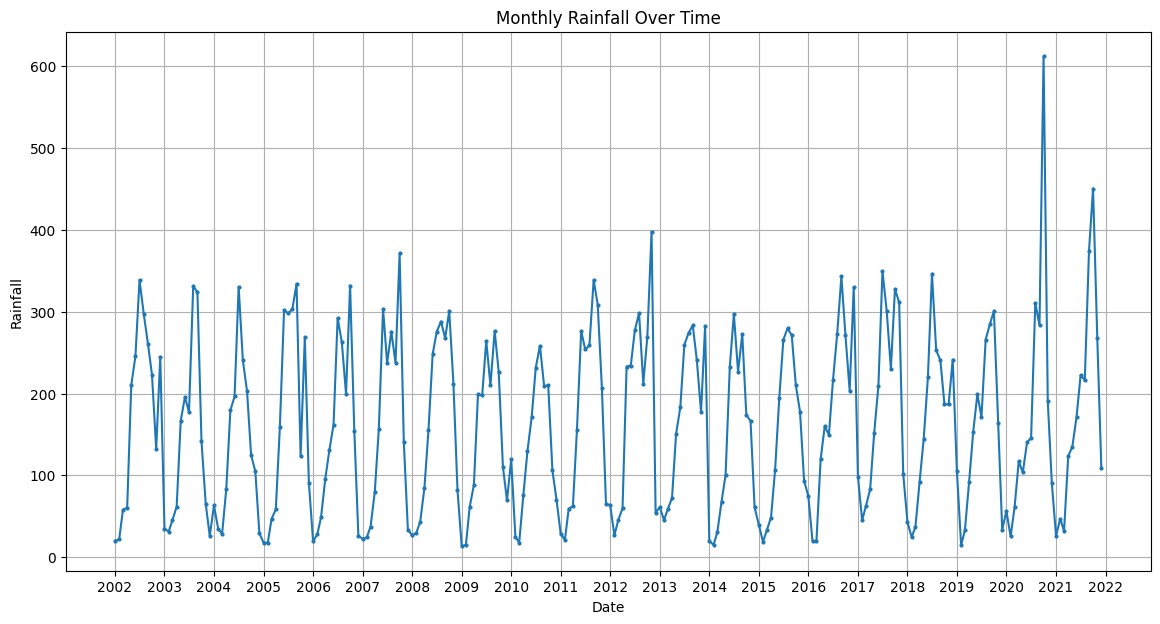

In [400]:
plt.figure(figsize=(14, 7))
plt.plot(rainfall_df_train.index, rainfall_df_train['Rainfall'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Monthly Rainfall Over Time')

plt.grid(True)
plt.show()


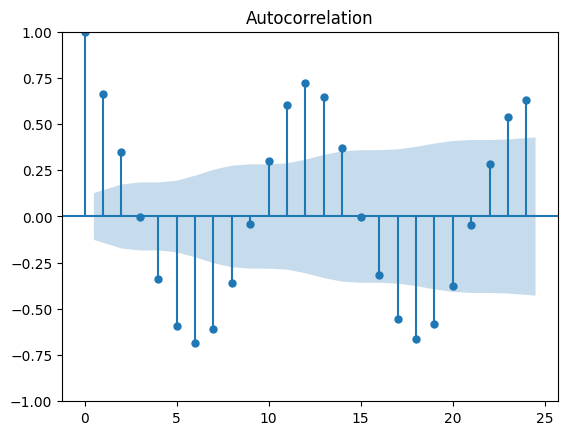

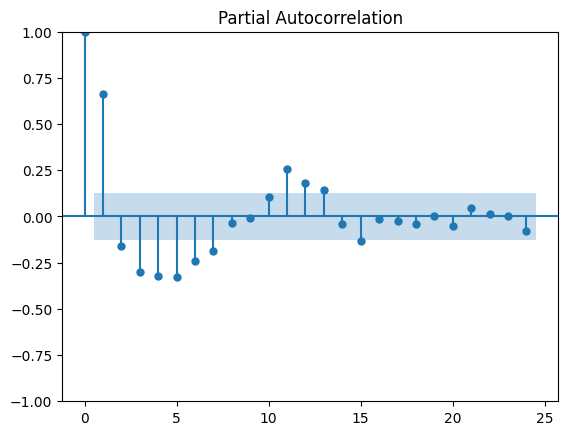

In [401]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'rainfall_df' is your DataFrame
# Select the 'rainfall' column
rainfall_series_train = rainfall_df_train['Rainfall']

# Plot ACF and PACF
acf_original = plot_acf(rainfall_series_train)
pacf_original = plot_pacf(rainfall_series_train)

In [402]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(rainfall_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.05704966620131037


<Axes: xlabel='Date'>

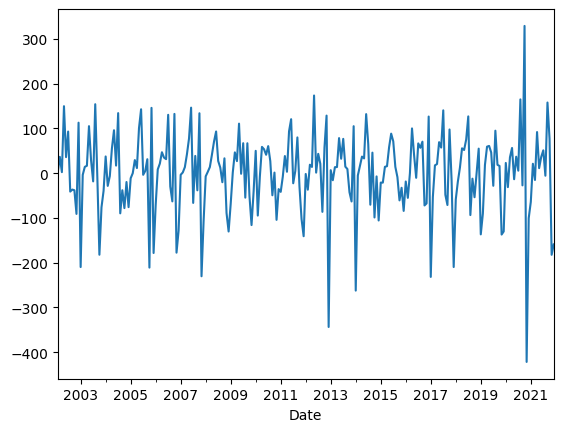

In [403]:
df_train_diff1 = rainfall_series_train.diff().dropna()
df_train_diff1.plot()

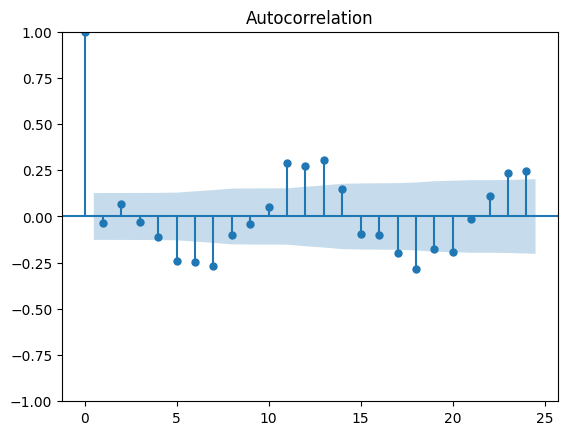

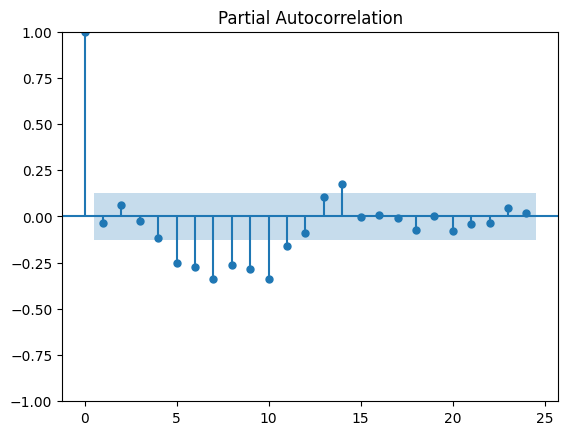

In [404]:
acf_diff1 = plot_acf(df_train_diff1)
pacf_diff1 = plot_pacf(df_train_diff1)

In [405]:
adf_test1 = adfuller(df_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 5.968587915188183e-11


In [406]:
import pmdarima as pm

auto_arima = pm.auto_arima(rainfall_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=5, max_D=1, max_Q=5,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=1, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2829.241, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2792.407, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2810.942, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2827.245, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2830.959, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2771.730, Time=0.41 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2801.606, Time=0.26 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2759.343, Time=0.63 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2781.889, Time=0.20 sec
 ARIMA(2,1,0)(3,0,0)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=i

In [407]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
rainfall_model = ARIMA(rainfall_series_train, 
                     order=(2,1,0), 
                     seasonal_order=(1,0,1,12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_rainfall_model = rainfall_model.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [408]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_rainfall_model, path_rainfall_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\rainfall.pkl']

In [409]:
rainfall_series_test = rainfall_df_test['Rainfall']

In [410]:
rainfall_series = pd.concat([rainfall_series_train, rainfall_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(rainfall_series.head())
print(rainfall_series.tail())


Date
2002-01-01     20.0285
2002-02-01     21.6108
2002-03-01     58.0542
2002-04-01     60.3292
2002-05-01    209.9270
Name: Rainfall, dtype: float64
Date
2022-08-01    303.686667
2022-09-01    412.233333
2022-10-01    373.926667
2022-11-01    179.473333
2022-12-01    148.560000
Name: Rainfall, dtype: float64


In [411]:
# Tải mô hình từ file
loaded_rainfall_model = joblib.load(path_rainfall_model)

rainfall_series_prediction = loaded_rainfall_model.forecast(len(rainfall_series_test))

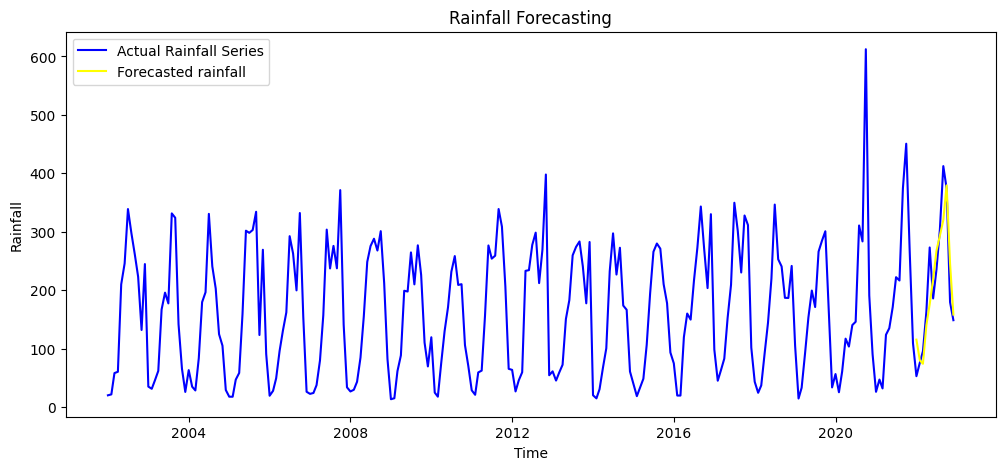

In [412]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(rainfall_series, color='blue', label='Actual Rainfall Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của rainfall_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = rainfall_series_prediction.index
plt.plot(prediction_index, rainfall_series_prediction, color='yellow', label='Forecasted rainfall')

# Thêm tiêu đề và nhãn
plt.title('Rainfall Forecasting')
plt.xlabel('Time')
plt.ylabel('Rainfall')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [413]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(rainfall_series_test, rainfall_series_prediction)
mape = mean_absolute_percentage_error(rainfall_series_test, rainfall_series_prediction)
rmse = np.sqrt(mean_squared_error(rainfall_series_test, rainfall_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 38.078530693807835
mape - manual: 0.24829106224638076
rmse - manual: 49.63563545798108
